In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

import plotly.graph_objects as go
import ipdb



In [26]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [27]:
seasons_df=pd.read_pickle('data/seasons_betting_constants_df.pkl')

In [28]:
len(seasons_df['season'].value_counts())

19

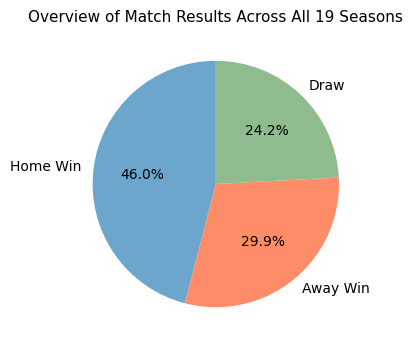

In [67]:
# Calculate value counts for 'result' column
result_counts = seasons_df['FTR'].value_counts()

# Define the mapping of FTR values to descriptive labels
label_mapping = {'H': 'Home Win', 'D': 'Draw', 'A': 'Away Win'}
result_counts.index = result_counts.index.map(label_mapping)

# Define slightly adjusted colors
color_mapping = {
    'Away Win': '#FF8C69',  # Coral
    'Home Win': '#6CA6CD',  # Light steel blue
    'Draw': '#8FBC8F'       # Dark sea green
}
colors = [color_mapping[label] for label in result_counts.index]

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(result_counts, labels=result_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Overview of Match Results Across All 19 Seasons", fontsize=11)
plt.show()


In [6]:
# Get the distribution of home wins, away wins, and draws by season
ftr_distribution_by_season = seasons_df.groupby(['season', 'FTR'])['FTR'].count().unstack(fill_value=0)


In [24]:
# Get the distribution of home wins, away wins, and draws by season
ftr_distribution_by_season = seasons_df.groupby(['season', 'FTR'])['FTR'].count().unstack(fill_value=0)

ftr_distribution_by_season=ftr_distribution_by_season[['H', 'D', 'A']]

# Rename the columns for better readability
ftr_distribution_by_season.columns = ['Home Wins', 'Draws', 'Away Wins']

ftr_distribution_by_season=ftr_distribution_by_season / 380



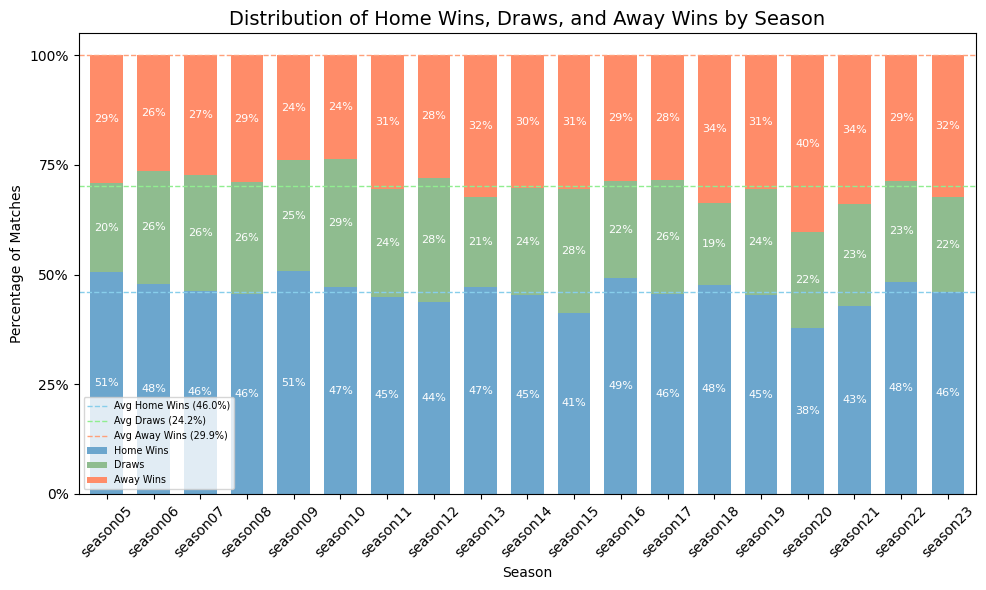

In [63]:
import matplotlib.pyplot as plt

# Get the distribution of home wins, away wins, and draws by season
ftr_distribution_by_season = seasons_df.groupby(['season', 'FTR'])['FTR'].count().unstack(fill_value=0)

# Reorder and rename the columns for better readability
ftr_distribution_by_season = ftr_distribution_by_season[['H', 'D', 'A']]
ftr_distribution_by_season.columns = ['Home Wins', 'Draws', 'Away Wins']

# Normalize by dividing each value by 380 (total number of matches per season)
ftr_distribution_by_season = ftr_distribution_by_season / 380

# Calculate the average percentage for each outcome across all seasons
average_distribution = ftr_distribution_by_season.mean()

# Cumulatively sum the averages for stacked positioning
cumulative_avg = average_distribution.cumsum()

# Define the colors in the same order as the labels
color_mapping = {'Home Wins': '#6CA6CD',  # Sky blue
                 'Draws': '#8FBC8F',  # Light green
                 'Away Wins': '#FF8C69'}  # Light salmon

colors = [color_mapping[label] for label in ftr_distribution_by_season.columns]

# Plotting the distribution of home wins, draws, and away wins for each season
ax = ftr_distribution_by_season.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.7, color=colors)

# Adding labels and title
plt.title('Distribution of Home Wins, Draws, and Away Wins by Season',fontsize=14)
plt.xlabel('Season')
plt.ylabel('Percentage of Matches')
plt.xticks(rotation=45)

# Set y-axis ticks to show 0%, 25%, 50%, 75%, 100%
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Annotating the percentage values on each segment of the bars
for p in ax.patches:
    height = p.get_height()  # Height of the bar segment
    width = p.get_width()    # Width of the bar segment
    x = p.get_x() + width / 2  # X position of the label (center of the bar)
    y = p.get_y() + height / 2  # Y position of the label (center of the bar segment)

    # Calculate the percentage for this segment
    percentage = height * 100  # Total percentage for this segment

    # Add the percentage as text on the bar
    ax.text(x, y, f'{percentage:.0f}%', ha='center', va='center', fontsize=8, color='white')

# Adding average levels as stacked horizontal dashed lines with unique colors
plt.axhline(y=cumulative_avg['Home Wins'], color='#87CEEB', linestyle='--', linewidth=1, label=f'Avg Home Wins ({average_distribution["Home Wins"] * 100:.1f}%)')
plt.axhline(y=cumulative_avg['Draws'], color='#90EE90', linestyle='--', linewidth=1, label=f'Avg Draws ({average_distribution["Draws"] * 100:.1f}%)')
plt.axhline(y=cumulative_avg['Away Wins'], color='#FFA07A', linestyle='--', linewidth=1, label=f'Avg Away Wins ({average_distribution["Away Wins"] * 100:.1f}%)')

# Adding legend for the averages and moving it to the bottom-left with smaller font
plt.legend(loc='lower left', fontsize=6.9)

# Show the plot
plt.tight_layout()
plt.show()


## comparing FTR to betting markets prediction

In [11]:

# Assuming `seasons_df` is your DataFrame containing FTR and B365 columns

# Create a column for the betting market's predicted outcome
seasons_df['MarketPrediction'] = seasons_df[['B365H', 'B365D', 'B365A']].idxmin(axis=1)

# Map the betting market predictions to match the FTR format
mapping = {'B365H': 'H', 'B365D': 'D', 'B365A': 'A'}
seasons_df['MarketPrediction'] = seasons_df['MarketPrediction'].map(mapping)

# Calculate the accuracy of the betting market
accuracy = (seasons_df['MarketPrediction'] == seasons_df['FTR']).mean()

print(f"Betting Market Accuracy: {accuracy:.2%}")


Betting Market Accuracy: 55.12%


In [12]:
season22=seasons_df[seasons_df['season']=='season22']
season22=season22.copy()

In [13]:

# Assuming `seasons_df` is your DataFrame containing FTR and B365 columns

# Create a column for the betting market's predicted outcome
season22['MarketPrediction'] = season22[['B365H', 'B365D', 'B365A']].idxmin(axis=1)

# Map the betting market predictions to match the FTR format
mapping = {'B365H': 'H', 'B365D': 'D', 'B365A': 'A'}
season22['MarketPrediction'] = season22['MarketPrediction'].map(mapping)

# Calculate the accuracy of the betting market
accuracy = (season22['MarketPrediction'] == season22['FTR']).mean()

print(f"Betting Market Accuracy: {accuracy:.2%}")

Betting Market Accuracy: 55.79%


In [14]:
def calculate_market_accuracy(df, season):
    """
    Calculate the betting market accuracy for a specific season.

    Parameters:
    - df: pandas DataFrame containing FTR and B365 columns
    - season: string, the specific season to calculate accuracy for (e.g., 'season21')

    Returns:
    - accuracy: float, the betting market accuracy as a percentage
    """
    # Filter the DataFrame for the given season
    season_df = df[df['season'] == season].copy()
    
    # Create a column for the betting market's predicted outcome
    season_df['MarketPrediction'] = season_df[['B365H', 'B365D', 'B365A']].idxmin(axis=1)
    
    # Map the betting market predictions to match the FTR format
    mapping = {'B365H': 'H', 'B365D': 'D', 'B365A': 'A'}
    season_df['MarketPrediction'] = season_df['MarketPrediction'].map(mapping)
    
    # Calculate the accuracy of the betting market
    accuracy = (season_df['MarketPrediction'] == season_df['FTR']).mean()
    
    #print(f"Betting Market Accuracy for {season}: {accuracy:.2%}")
    return accuracy


In [15]:
accuracy_season21 = calculate_market_accuracy(seasons_df, 'season21')
accuracy_season21

0.5815789473684211

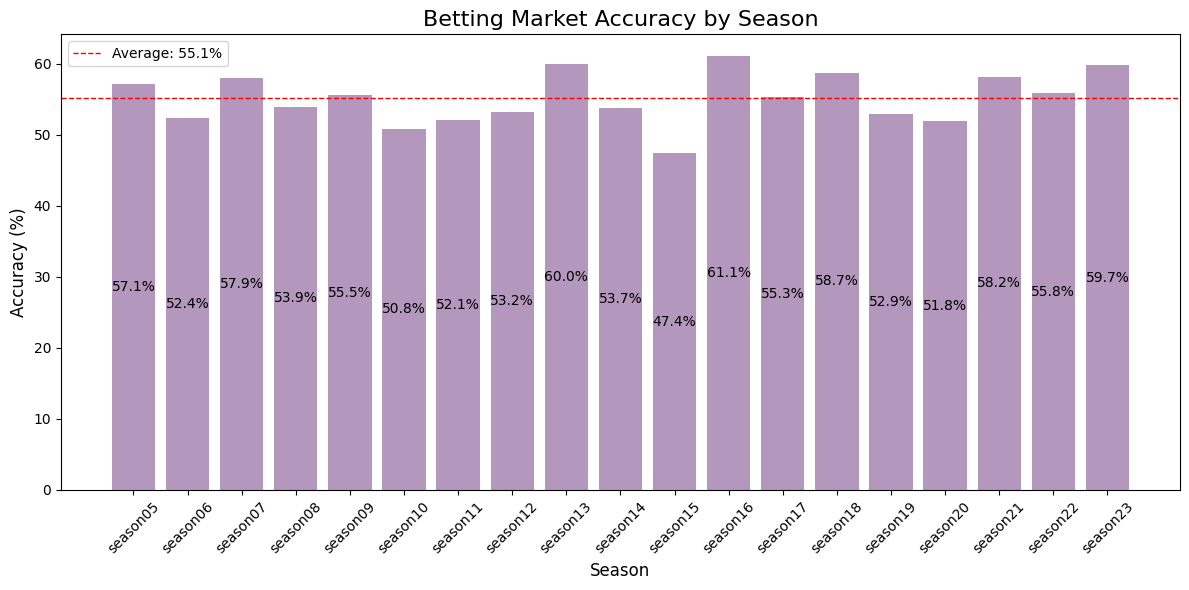

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# List of seasons
seasons = [f'season{year:02}' for year in range(5, 24)]  # Generates season05 to season23

# Store accuracy results
accuracy_results = {}

# Calculate accuracy for each season
for season in seasons:
    accuracy = calculate_market_accuracy(seasons_df, season)
    accuracy_results[season] = accuracy

# Convert results to a sorted list for plotting
sorted_seasons = sorted(accuracy_results.keys())
accuracies = [accuracy_results[season] * 100 for season in sorted_seasons]  # Convert to percentages

# Calculate the overall average accuracy
overall_average = np.mean(accuracies)

# Plot the results
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_seasons, accuracies, color='#B497BD')

# Add percentage values inside each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        bar.get_height() / 2,              # Y position (middle of the bar)
        f'{accuracy:.1f}%',                # Text (percentage)
        ha='center', va='center',          # Center alignment
        color='black', fontsize=10         # Font style
    )

# Add a horizontal line for the overall average
plt.axhline(overall_average, color='red', linestyle='--', linewidth=1, label=f'Average: {overall_average:.1f}%')

# Add legend and labels
plt.legend(fontsize=10)
plt.title('Betting Market Accuracy by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### comparing the season level accuracy with the FTR values

In [88]:
from scipy.stats import pearsonr

def analyze_market_accuracy_and_ftr_correlations(seasons_df):
    """
    Analyze the correlation between betting market accuracy and FTR distributions (Home Wins, Draws, Away Wins)
    across seasons and determine statistical significance.

    Parameters:
    - seasons_df: pandas DataFrame containing FTR, season, and betting odds columns (B365H, B365D, B365A)

    Returns:
    - results: A dictionary containing correlations, p-values, and statistical significance for each FTR outcome.
    """
    # Calculate market accuracy for each season
    seasons = seasons_df['season'].unique()
    market_accuracies = {}
    for season in seasons:
        season_df = seasons_df[seasons_df['season'] == season].copy()
        season_df['MarketPrediction'] = season_df[['B365H', 'B365D', 'B365A']].idxmin(axis=1)
        mapping = {'B365H': 'H', 'B365D': 'D', 'B365A': 'A'}
        season_df['MarketPrediction'] = season_df['MarketPrediction'].map(mapping)
        market_accuracies[season] = (season_df['MarketPrediction'] == season_df['FTR']).mean() * 100

    # Calculate the distribution of FTR outcomes (H, D, A) for each season
    ftr_distribution = seasons_df.groupby(['season', 'FTR'])['FTR'].count().unstack(fill_value=0)
    ftr_distribution = ftr_distribution[['H', 'D', 'A']]  # Ensure correct order
    ftr_distribution.columns = ['Home Wins', 'Draws', 'Away Wins']

    # Convert counts to percentages for better correlation
    ftr_distribution_percentage = ftr_distribution.div(ftr_distribution.sum(axis=1), axis=0) * 100

    # Add market accuracies to the DataFrame
    ftr_distribution_percentage['Market Accuracy'] = ftr_distribution_percentage.index.map(market_accuracies)

    # Initialize results container
    significance_results = {}

    # Test correlation and significance for each FTR outcome percentage
    for col in ['Home Wins', 'Draws', 'Away Wins']:
        corr, p_value = pearsonr(ftr_distribution_percentage[col], ftr_distribution_percentage['Market Accuracy'])
        significance_results[col] = {
            'Correlation': corr,
            'p-value': p_value,
            'Significant': p_value < 0.05
        }

    # Print results
    print("Correlation and Statistical Significance:")
    for outcome, results in significance_results.items():
        significance = "Statistically Significant" if results['Significant'] else "Not Statistically Significant"
        print(f"{outcome}: Correlation = {results['Correlation']:.2f}, "
              f"p-value = {results['p-value']:.4f} ({significance})")

    return significance_results


In [89]:
# Call the function with your seasons_df DataFrame
results = analyze_market_accuracy_and_ftr_correlations(seasons_df)


Correlation and Statistical Significance:
Home Wins: Correlation = 0.49, p-value = 0.0341 (Statistically Significant)
Draws: Correlation = -0.68, p-value = 0.0014 (Statistically Significant)
Away Wins: Correlation = 0.12, p-value = 0.6234 (Not Statistically Significant)


In [90]:
seasons_df_no20=seasons_df[~(seasons_df['season']=='season20')]

In [91]:
# Call the function with your seasons_df DataFrame
results = analyze_market_accuracy_and_ftr_correlations(seasons_df_no20)

Correlation and Statistical Significance:
Home Wins: Correlation = 0.46, p-value = 0.0545 (Not Statistically Significant)
Draws: Correlation = -0.75, p-value = 0.0003 (Statistically Significant)
Away Wins: Correlation = 0.37, p-value = 0.1317 (Not Statistically Significant)


### comparing columns to result field

In [19]:
# List of columns to convert
columns_to_convert = [
    'diff.total.win', 'diff.total.draw', 'diff.total.loss',
    'diff.total.goals', 'diff.total.conceded', 'diff.total.half_goals',
    'diff.total.half_conceded', 'diff.total.shots', 'diff.total.shots_against',
    'diff.total.shots_target', 'diff.total.shots_against_target', 'diff.total.corners',
    'diff.total.corners_conceded', 'diff.total.fouls', 'diff.total.fouls_other_team',
    'diff.total.yellows', 'diff.total.reds', 'diff.last3.win', 'diff.last3.draw',
    'diff.last3.loss', 'diff.last3.goals', 'diff.last3.conceded', 'diff.last3.half_goals',
    'diff.last3.half_conceded', 'diff.last3.shots', 'diff.last3.shots_against',
    'diff.last3.shots_target', 'diff.last3.shots_against_target', 'diff.last3.corners',
    'diff.last3.corners_conceded', 'diff.last3.fouls', 'diff.last3.fouls_other_team',
    'diff.last3.yellows', 'diff.last3.reds', 'diff.total.win.whenHorA', 'diff.total.draw.whenHorA',
    'diff.total.loss.whenHorA'
]

# Convert columns to numeric, coercing errors to NaN
seasons_df[columns_to_convert] = seasons_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Optionally, check the conversion
print(seasons_df.dtypes)


Date                      datetime64[ns]
HomeTeam                          object
AwayTeam                          object
FTR                               object
home.matchNumber                   int64
                               ...      
diff.totWinterArrivals             int64
diff.totWinterBalance            float64
diff.PositionAward               float64
diff.PositionAward2              float64
MarketPrediction                  object
Length: 61, dtype: object


In [20]:
# Mapping categorical values to numeric values
# This mapping makes sense because all my "diff" features are from the point of view of the home team. (home team - away team)
seasons_df['FTR_numeric'] = seasons_df['FTR'].map({'H': 3, 'D': 2, 'A': 1})


In [21]:
# Select only the numeric columns from the DataFrame
numeric_columns = seasons_df.select_dtypes(include=['number']).columns


In [22]:
# Calculate correlations with the FTR_numeric column
correlation_with_ftr = seasons_df[numeric_columns].corr()['FTR_numeric'].sort_values(ascending=False)

correlation_with_ftr



FTR_numeric                        1.000000
diff.PositionAward                 0.355707
AvgA                               0.348906
B365A                              0.348280
diff.total.shots                   0.347916
MaxA                               0.336944
diff.total.shots_target            0.335738
diff.PositionAward2                0.334652
diff.total.win                     0.312570
diff.total.goals                   0.305583
diff.total.corners                 0.274882
diff.total.win.whenHorA            0.263036
diff.last3.shots                   0.262165
diff.last3.shots_target            0.251400
diff.total.half_goals              0.243208
diff.last3.goals                   0.212920
diff.last3.win                     0.209351
diff.last3.corners                 0.174749
MaxD                               0.173344
B365D                              0.171027
AvgD                               0.169623
diff.last3.half_goals              0.156724
diff.totSummerBalance           